## HW03
## Paimah Safarian 96109628


## 03- Ijad Khooshe Binahayat

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import random

In [2]:
def light_up(grid, p, L):
    random.random()
    lights = 0
    for i in range(0, L):
        for j in range(0, L):
            if j == 0:
                grid[i][j] = 1
                lights += 1
            elif random.random() <= p:
                grid[i][j] = 1
                lights += 1
            else:
                grid[i][j] = 0 
    return grid, lights

In [3]:
#define a function which do the algorithm 
def HK(L, p):
    grid = np.zeros((L, L))
    grid, lights = light_up(grid, p, L)
    
    #خانه های مقدار گرفته را در خود ذخیره می کند
    l = [0]
    #the color of each cell
    color = 1
    #size of khooshe
    s = [0]

    #first j... because we want to explore from top to bottom and then left to right...
    for j in range(0, L):
        for i in range(0, L):
            if grid[i, j] == 1:
                if (i==0 and j==0) or (i==0 and grid[i, j-1]==0) or (j==0 and grid[i-1, j]==0) or (grid[i-1, j]==0 and grid[i, j-1]==0):
                    grid[i, j] = color
                    l.append(color)
                    s.append(1)
                    color += 1

                elif i == 0 and grid[i, j-1] != 0:
                    grid[i, j] = grid[i, j-1]
                    s[l[int(grid[i, j-1])]] += 1

                elif j == 0 and grid[i-1, j] != 0:
                    grid[i, j] = grid[i-1, j]
                    s[l[int(grid[i-1, j])]] +=1

                elif grid[i, j-1]==0 and grid[i-1, j]!=0:
                    grid[i, j] = grid[i-1, j]
                    s[l[int(grid[i-1, j])]] += 1

                elif grid[i, j-1] != 0 and grid[i-1, j]==0:
                    grid[i, j] = grid[i, j-1]
                    s[l[int(grid[i, j-1])]] += 1

                else:
                    grid[i, j] = grid[i, j-1]
                    s[l[int(grid[i, j-1])]] += 1
                    if l[int(grid[i-1, j])] != l[int(grid[i, j-1])]:
                        s[l[int(grid[i, j-1])]] += s[l[int(grid[i-1, j])]]
                        s[l[int(grid[i-1, j])]] = 0
                    measure = l[int(grid[i-1, j])]
                    for r in range(len(l)):
                        if l[r] == measure:
                            l[r] = l[int(grid[i, j-1])]


    for j in range(0, L):
        for i in range(0, L):
            if grid[i, j] != 0:
                index = int(grid[i, j])
                grid[i, j] = l[index]


    return grid, l, s


CPU times: user 1h 6s, sys: 508 ms, total: 1h 6s
Wall time: 1h 9s


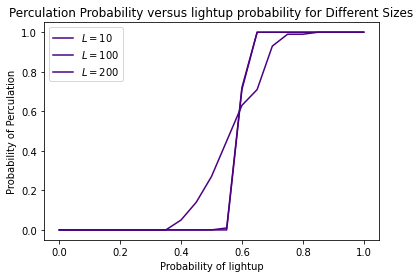

In [ ]:
%%time

L = [10, 100, 200]
l_size = np.size(L)

P = np.arange(0, 105, 5)
p_size = np.size(P)

Q = np.zeros(100)
Q_l = np.zeros((l_size, p_size))

for l in range(l_size):
    for k in range(p_size):
        Q_l[l, k] = 0
        for m in range(100):
            Q[m] = 0
            Latt, ls, s = HK(L[l], P[k]/100)
#             print(Latt)
            for i in range(L[l]):
                if Latt[i, (L[l]-1)] == Latt[0, 0]:
                    Q[m] += 1
#                     print(m, Q[m])
                    break
        
        Q_l[l, k] = np.mean(Q[:])


    plt.plot(P/100, Q_l[l,:], c = 'indigo', label = '$L= {}$'.format(L[l]))



# print(Q_l)
plt.title("Perculation Probability versus lightup probability for Different Sizes")
plt.ylabel('Probability of Perculation')
plt.xlabel('Probability of lightup')
# plt.xlim(0, 0.2)
plt.legend()
plt.savefig('QP.png')

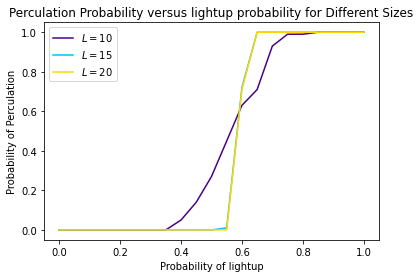

In [ ]:
color = ['indigo', 'deepskyblue', 'gold']

for l in range(3):
   plt.plot(P/100, Q_l[l,:], c = color[l], label = '$L= {}$'.format(L[l]))

plt.title("Perculation Probability versus lightup probability for Different Sizes")
plt.ylabel('Probability of Perculation')
plt.xlabel('Probability of lightup')
# plt.xlim(0, 0.2)
plt.legend()
plt.savefig('QP.png')

## 04-Etesal Khooshe Binahayt

CPU times: user 1h 1min 15s, sys: 442 ms, total: 1h 1min 15s
Wall time: 1h 1min 18s


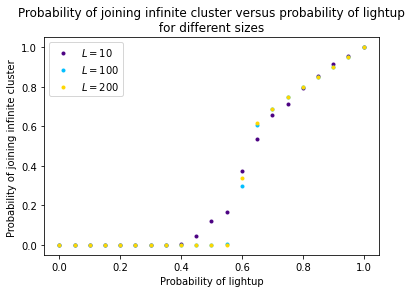

In [ ]:
%%time

color = ['indigo', 'deepskyblue', 'gold']

L = [10, 100, 200]
l_size = np.size(L)

P = np.arange(0, 105, 5)
p_size = np.size(P)

prob = np.zeros(100)
prob_l = np.zeros((l_size, p_size))

for l in range(l_size):
    for k in range(p_size):
        prob_l[l, k] = 0
        for m in range(100):
            prob[m] = 0
            Latt, ls, s = HK(L[l], P[k]/100)

            for i in range(L[l]):
                if Latt[i, (L[l]-1)] == Latt[0, 0]:
                    prob[m] = s[ls[1]]/(L[l] ** 2)
                    break
        
        prob_l[l, k] = np.mean(prob[:])


    plt.plot(P/100, prob_l[l,:], '.', c = color[l], label = '$L= {}$'.format(L[l]))




plt.title("Probability of joining infinite cluster versus probability of lightup\n for different sizes ")
plt.ylabel('Probability of joining infinite cluster ')
plt.xlabel('Probability of lightup')

plt.legend()
plt.savefig('Prob.png')